# Heart Disease Dataset

# DATA PREPROCESSING

# importing libraries

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score



# by using pandas read csv method read file (which is my data set)

In [142]:
df=pd.read_csv("heart.csv")

#  to see whole dataset

In [143]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# The shape property returns a tuple representing the dimensionality of the DataFrame.

In [144]:
df.shape

(1025, 14)

# The info() method prints information about the Dataset

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# describe() method is used for calculating some statistical data 

In [146]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Exploratory Data Analysis (EDA)

# hist showing the number of observations within each given interval

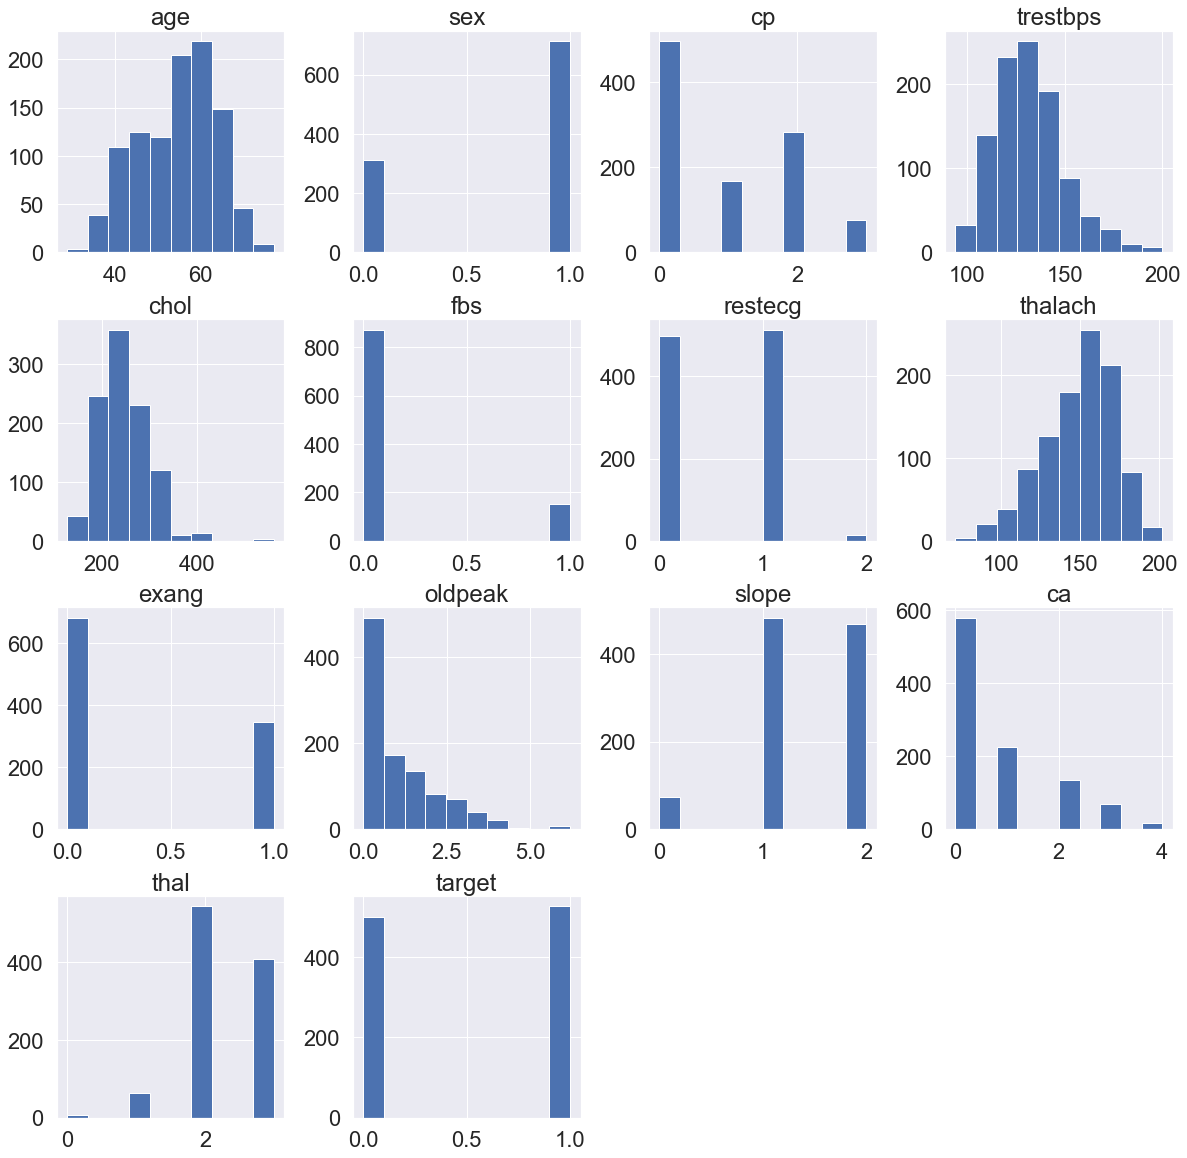

In [147]:
sns.set(font_scale=2)
df.hist(figsize=(20,20))
plt.show()

In [148]:
df["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

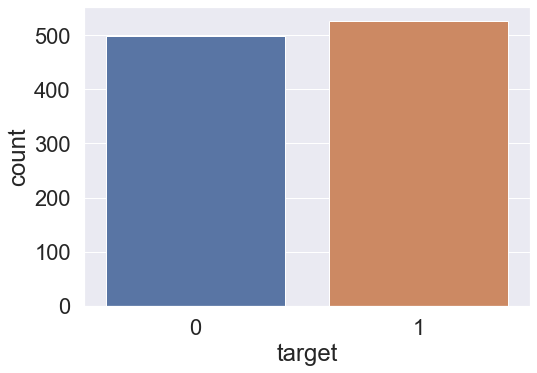

In [149]:
sns.countplot(x="target",data=df)

In [150]:
df.groupby('sex')['target'].value_counts()

sex  target
0    1         226
     0          86
1    0         413
     1         300
Name: target, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

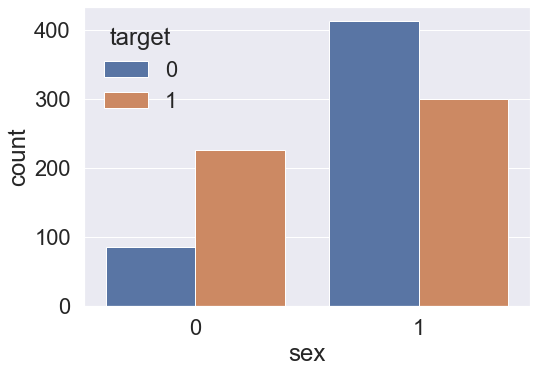

In [151]:
sns.countplot(x="sex",hue="target",data=df)

In [152]:
df.target.value_counts().values

array([526, 499], dtype=int64)

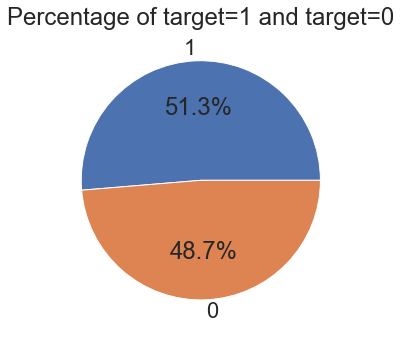

In [153]:
plt.pie(df.target.value_counts().values , labels=df.target.value_counts().index,autopct='%1.1f%%')
plt.title('Percentage of target=1 and target=0' , loc='center')
plt.show()

In [154]:
numerical_features=['age','trestbps', 'chol' , 'thalach','oldpeak']
df[numerical_features].describe()

,age,trestbps,chol,thalach,oldpeak
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512
std,9.072290,17.516718,51.59251,23.005724,1.175053
min,29.000000,94.000000,126.00000,71.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000
75%,61.000000,140.000000,275.00000,166.000000,1.800000
max,77.000000,200.000000,564.00000,202.000000,6.200000


In [155]:
def numerical(f_name):
    plt.figure(figsize=(15,5))
    plt.suptitle('distribution of numerical feature : {}'.format(f_name) , fontweight='heavy')
    plt.style.use('seaborn-dark-palette')
    plt.subplot(1,2,1)
    sns.histplot(data=df,x=f_name , kde=True )
    
    plt.subplot(1,2,2)
    sns.boxenplot(data=df , x=f_name,linewidth=1.5)

[None, None, None, None, None]

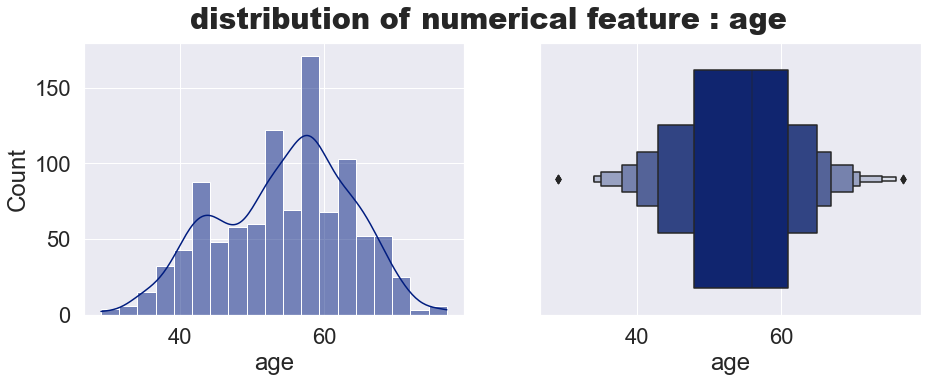

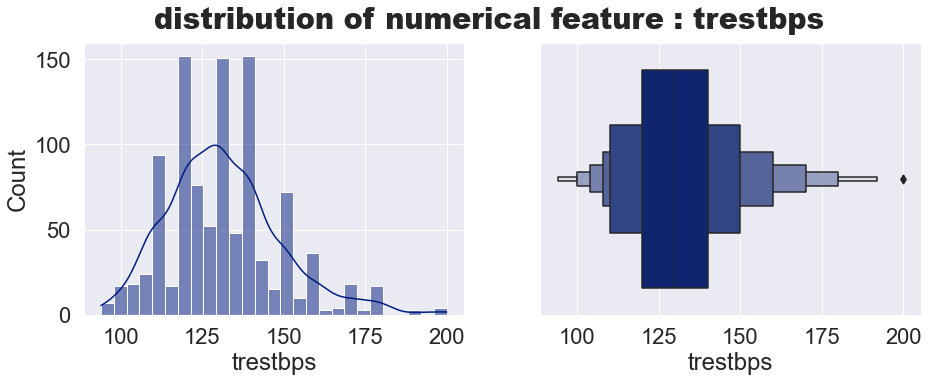

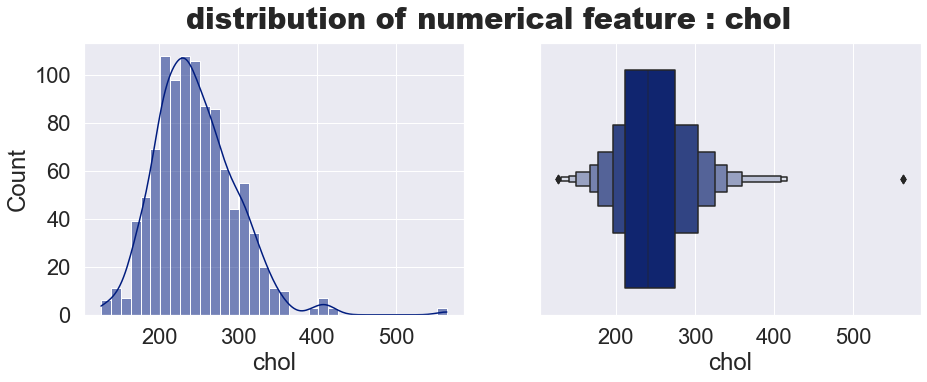

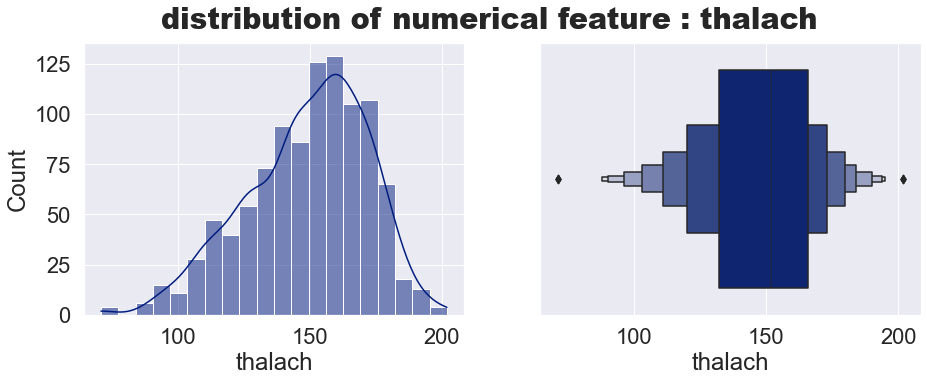

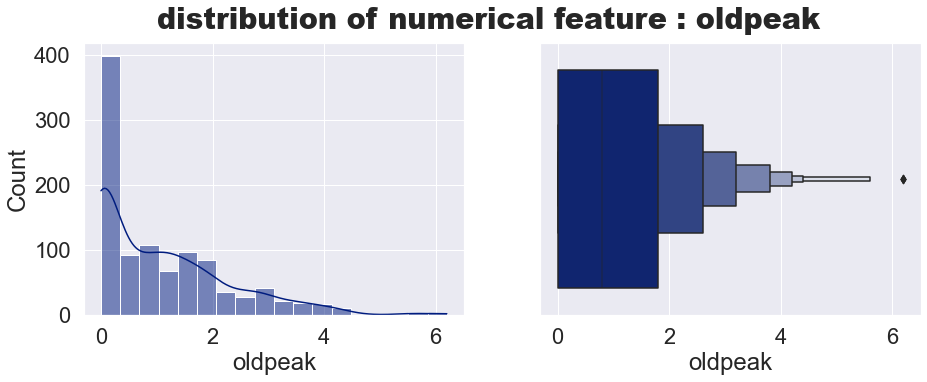

In [156]:
list(map(numerical,numerical_features))

# It is a simple cross-tabulation that help us to understand the relationship between two or more variable
# distribution of categorical values in relation to target

In [157]:
dfs=['sex','cp','fbs','restecg','exang','slope' ,'ca','thal' ]

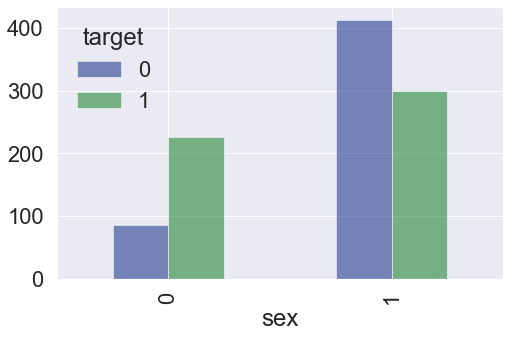

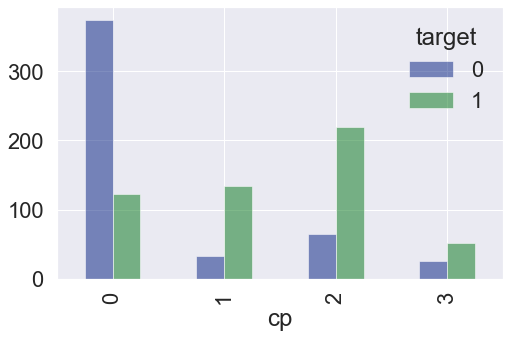

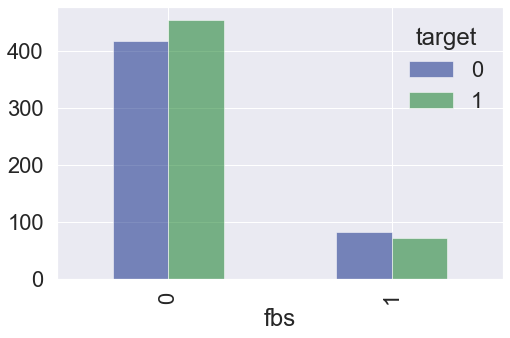

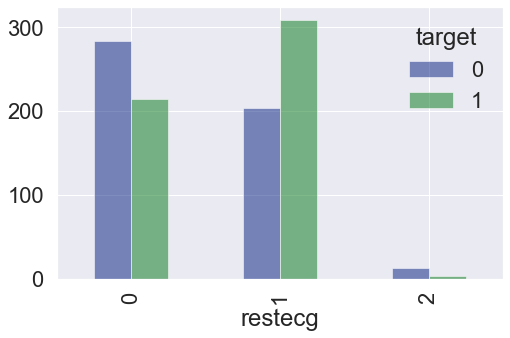

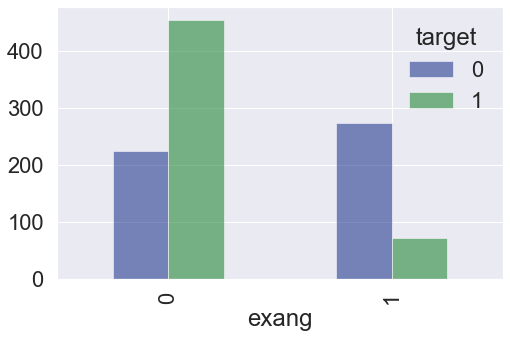

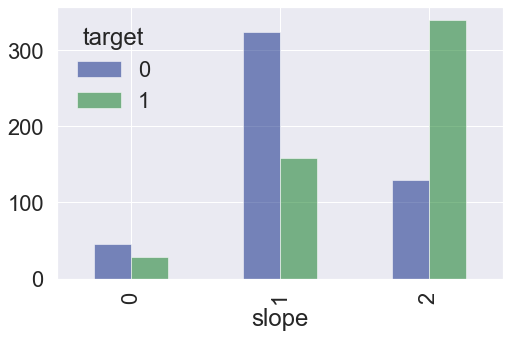

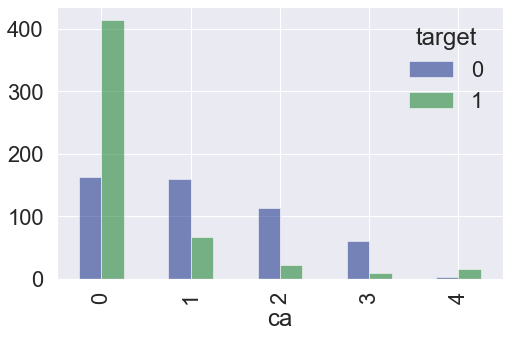

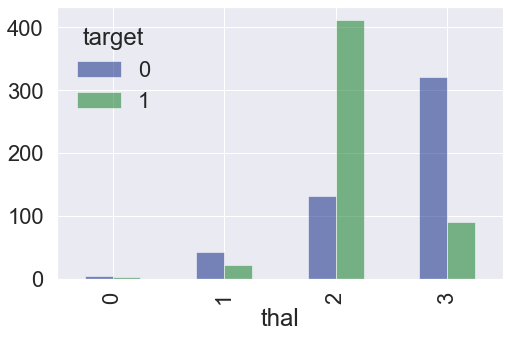

In [158]:
for col in dfs:
    pd.crosstab(df[col], df.target).plot(kind='bar', figsize=(8, 5), alpha=0.50)

# heat map to tell the correlation between all the given categories or column

In [159]:
#correlation
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<AxesSubplot:>

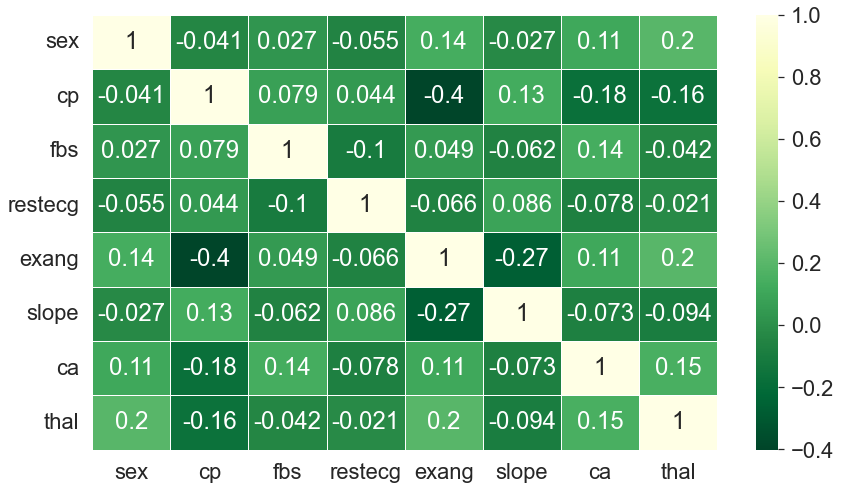

In [160]:
plt.figure(figsize=(14, 8)) 
sns.heatmap(df[dfs].corr(),annot=True,cmap='YlGn_r', linewidths=0.6)


In [161]:
# Machine leaning

In [162]:
cp = pd.get_dummies(df['cp'], prefix='cp')
restecg = pd.get_dummies(df['restecg'], prefix='restecg')
slope = pd.get_dummies(df['slope'], prefix='slope')
ca = pd.get_dummies(df['ca'], prefix='ca')
thal = pd.get_dummies(df['thal'], prefix='thal')

In [163]:
df.drop(columns=['cp','restecg', 'thal','ca', 'slope'] , inplace=True)
frames = [df, cp,restecg, thal,ca, slope]
df = pd.concat(frames, axis = 1)

In [164]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,target,cp_0,...,thal_2,thal_3,ca_0,ca_1,ca_2,ca_3,ca_4,slope_0,slope_1,slope_2
0,52,1,125,212,0,168,0,1.0,0,1,...,0,1,0,0,1,0,0,0,0,1
1,53,1,140,203,1,155,1,3.1,0,1,...,0,1,1,0,0,0,0,1,0,0
2,70,1,145,174,0,125,1,2.6,0,1,...,0,1,1,0,0,0,0,1,0,0
3,61,1,148,203,0,161,0,0.0,0,1,...,0,1,0,1,0,0,0,0,0,1
4,62,0,138,294,1,106,0,1.9,0,1,...,1,0,0,0,0,1,0,0,1,0


In [165]:
X=df.drop(columns='target')
y=df['target']

In [166]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, shuffle=True)

In [167]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=1000, random_state=1, max_leaf_nodes=20, min_samples_split=15)

RF_model.fit(X_train, y_train)
y_pred_RF = RF_model.predict(X_test)
RFacc = accuracy_score(y_pred_RF, y_test)
print('.:. RF  Accuracy:'+'\033[1m {:.1f}%'.format(RFacc*100)+' .:.')


.:. RF  Accuracy: 92.7% .:.


In [168]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred,labels=[0,1])
print(cm)

[[40 49]
 [51 65]]


<AxesSubplot:>

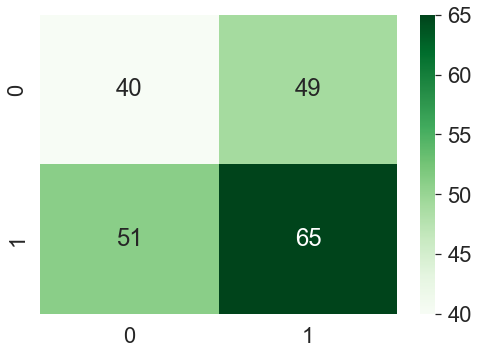

In [169]:
import seaborn as sns
sns.heatmap(cm,cmap="Greens",annot=True)